<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [30]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  506 non-null    int64   
 1   CRIM        506 non-null    float64 
 2   ZN          506 non-null    float64 
 3   INDUS       506 non-null    float64 
 4   CHAS        506 non-null    float64 
 5   NOX         506 non-null    float64 
 6   RM          506 non-null    float64 
 7   AGE         506 non-null    float64 
 8   DIS         506 non-null    float64 
 9   RAD         506 non-null    float64 
 10  TAX         506 non-null    float64 
 11  PTRATIO     506 non-null    float64 
 12  LSTAT       506 non-null    float64 
 13  MEDV        506 non-null    float64 
 14  age-binned  506 non-null    category
dtypes: category(1), float64(13), int64(1)
memory usage: 56.1 KB


## Questions

###### (For the following questions, state the hypothesis, use alpha = 0.05, perform the test statistics, state the conclusion from the test.)

### 1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test)

#### Hypothesis:

H0: There is not a significant difference in the median values of houses bounded by the Charles river.

HA: There is a significant difference in the median values of houses bounded by the Charles river.

#### A Barplot for Houses that Bound the Charles River

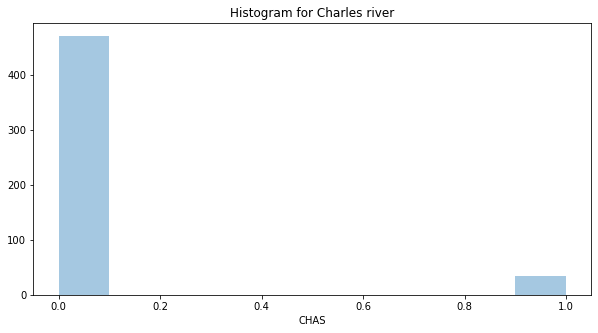

In [122]:
plt.figure(figsize=(10,5))
sns.distplot(a=boston_df.CHAS,bins=10, kde=False)
plt.title("Histogram for Charles river")
plt.show()

#### A Boxplot for Median Values of Owner-occupied Homes ($1000s)

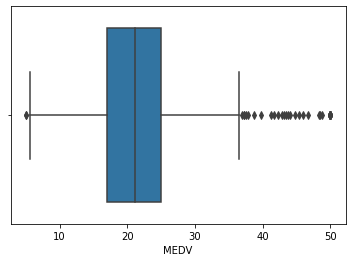

In [100]:
MedVal = sns.boxplot(x='MEDV', data=boston_df)

#### Test Statistics:

We can use Levenne's test to check for test significance. We then perform a T-test 

In [38]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center = 'mean')

LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

In [36]:
#scipy.stats.ttest_ind(boston_df['CHAS'], boston_df['MEDV'])

scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

#### Conclusion: 

Since the p-value is less than 0.05, we reject the null hypothesis, as it is evidenct there is a significant difference between the median values of houses bounded by the Charles river and  houses not bounded by the river. 

### 2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940? (ANOVA)

#### Hypothesis:

H0: There is not a difference in Median values of houses for each proportion of owner-occupied units built prior to 1940. 

HA: There is a difference in Median values of houses for each proportion of owner-occupied units built prior to 1940. 

We begin by binning the age variable into three categories.

In [98]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

In [109]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age-binned,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,"(35.267, 67.633]",between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,"(67.633, 100.0]",70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,"(35.267, 67.633]",between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,"(35.267, 67.633]",between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,"(35.267, 67.633]",between 35 and 70 years


#### A boxplot for Median value of owner-occupied homes.

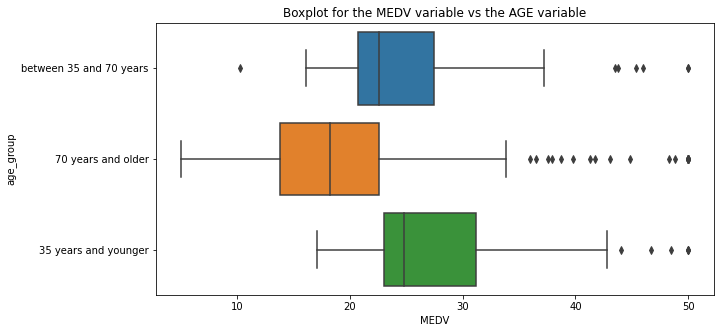

In [114]:
plt.figure(figsize=(10,5))
sns.boxplot(x=boston_df['MEDV'], y=boston_df['age_group'], data=boston_df)
plt.title("Boxplot for the MEDV variable vs the AGE variable")
plt.show()

#### Test Statistics:

We perform Levenne's test to check for equality of variance. We then perform ANOVA:

In [129]:
young = boston_df[boston_df['AGE'] == '35 years and younger']['MEDV']
med   = boston_df[boston_df['AGE'] == 'between 35 and 70 years']['MEDV']
old   = boston_df[boston_df['AGE'] == '70 years and older']['MEDV']                                                        

In [130]:
f_stats, p_value = scipy.stats.f_oneway(young,med,old,axis=0)
print("F_Statistic: {0}, P-Value: {1}".format(f_stats,p_value))

F_Statistic: nan, P-Value: nan


#### Conclusion:

Since the p-value is greater than 0.05, we fail to reject the null hypothesis, concludinmg that there is not a difference in Median values of houses for each proportion of owner-occupied units built prior to 1940. 

### 3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportions of non-retail business acres per town? (Pearson Correlation)

##### The following chart shows the relationshio between nitric oxide concentrations and the proportion of non-retail business acres per town.

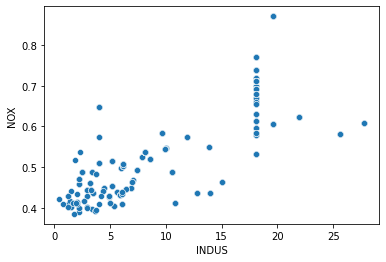

In [102]:
NOA = sns.scatterplot(x='INDUS', y='NOX', data=boston_df)

##### We see that there is a positive linear relationship between these variables, suggesting the concentration of nitric oxide increases as does the proportion of acres per town.

#### Hypothesis:

H0: There is not a relationship between nitric oxide concentrations and proportons of non-retail business acres per town.. 

HA: There is a relationship between nitric oxide concentrations and proportons of non-retail business acres per town.

#### Test Statistics:

We perform a Pearson correlation test to check the strength of the lineasr relationship between the variables.

In [105]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

(0.7636514469209149, 7.913361061240043e-98)

#### Conclusion:

Since the p-value is less that 0.05, we reject the null hypothesis, stating that there is a relationship between nitric oxide concentrations and proportons of non-retail business acres per town.

### 4. What is the impact of an additional weighted distance to the five Boston employment centers on the median value of owner occupied homes? (Regression analysis)

#### Hypothesis

H0: There is no impact of an additional weighted distance to the five Boston employment centers on the median value of owner occupied homes.
     
HA: There is an impact of an additional weighted distance to the five Boston employment centers on the median value of owner occupied homes.

##### The following histogram depicts the ratio of pupils to teachers per town.

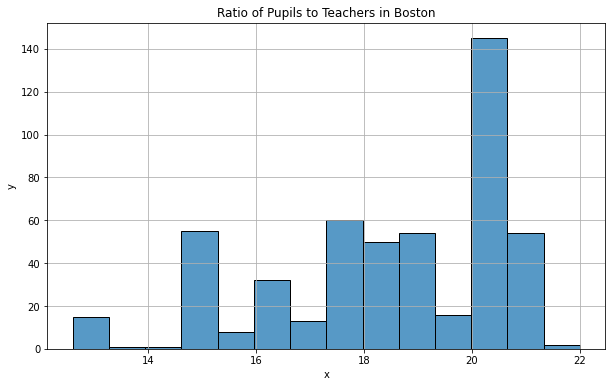

In [103]:
plt.figure(figsize=(10, 6))
sns.histplot(data=boston_df, x='PTRATIO')
plt.title('Ratio of Pupils to Teachers in Boston')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

#### Test Statistics:

We perform a regression analysis. 

In [107]:
y = boston_df['DIS']
X = boston_df['PTRATIO']
#X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    DIS   R-squared (uncentered):                   0.732
Model:                            OLS   Adj. R-squared (uncentered):              0.731
Method:                 Least Squares   F-statistic:                              1379.
Date:                Thu, 16 May 2024   Prob (F-statistic):                   1.70e-146
Time:                        17:06:11   Log-Likelihood:                         -1127.5
No. Observations:                 506   AIC:                                      2257.
Df Residuals:                     505   BIC:                                      2261.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PTRATIO        0.1998      0.005     37.137      0.000       0.189       0.210
==============================================================================
Omnibus:                       52.101   Durbin-Watson:                   0.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.543
Skew:                           0.887   Prob(JB):                     3.55e-15
Kurtosis:                       3.110   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusion:

With the probability of the F-statistic less than 0.05, we reject the null hypothesis, as there is an impact of an additional weighted distance to the five Boston employment centers on the median value of owner occupied homes.